In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/hi/Downloads/cell_images/Train'
valid_path = 'C:/Users/hi/Downloads/cell_images/Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('C:/Users/hi/Downloads/Dataset/Train/*')

In [6]:
folders

['C:/Users/hi/Downloads/Dataset/Train\\Parasite',
 'C:/Users/hi/Downloads/Dataset/Train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/hi/Downloads/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('C:/Users/hi/Downloads/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 13s 952ms/step - loss: 1.7660 - accuracy: 0.5889 - val_loss: 0.9566 - val_accuracy: 0.3731
Epoch 2/50
13/13 [==============================] - 12s 934ms/step - loss: 0.5325 - accuracy: 0.6875 - val_loss: 0.8631 - val_accuracy: 0.6642
Epoch 3/50
13/13 [==============================] - 13s 1s/step - loss: 0.5593 - accuracy: 0.7139 - val_loss: 1.3855 - val_accuracy: 0.3433
Epoch 4/50
13/13 [==============================] - 12s 908ms/step - loss: 0.5059 - accuracy: 0.7572 - val_loss: 0.8307 - val_accuracy: 0.4254
Epoch 5/50
13/13 [==============================] - 12s 930ms/step - loss: 0.4356 - accuracy: 0.7933 - val_loss: 1.1219 - val_accuracy: 0.3582
Epoch 6/50
13/13 [==============================] - 12s 935ms/step - loss: 0.4156 - accuracy: 0.8077 - val_loss: 0.8887 - val_accuracy: 0.4030
Epoch 7/50
13/13 [==============================] - 12s 937ms/step - loss: 0.4508 - accuracy: 0.7837 - val_loss: 1.2241 - val_accuracy: 0.3731
Ep

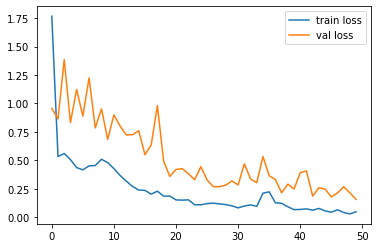

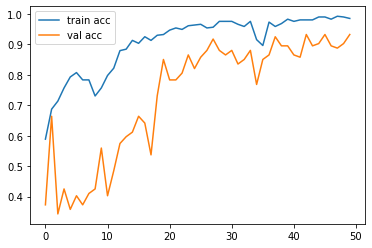

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 133ms/step


In [21]:
y_pred

array([[1.95937958e-02, 9.80406165e-01],
       [9.99199688e-01, 8.00300972e-04],
       [6.52384311e-02, 9.34761524e-01],
       [2.25909337e-01, 7.74090648e-01],
       [9.97938216e-01, 2.06172885e-03],
       [9.99988317e-01, 1.16779920e-05],
       [2.23469272e-01, 7.76530683e-01],
       [9.95105147e-01, 4.89481678e-03],
       [6.97854534e-02, 9.30214584e-01],
       [9.99999881e-01, 8.45201455e-08],
       [9.99199450e-01, 8.00521695e-04],
       [7.18173757e-02, 9.28182602e-01],
       [5.55877713e-03, 9.94441211e-01],
       [9.99835253e-01, 1.64768397e-04],
       [9.99668002e-01, 3.32039723e-04],
       [2.67393216e-02, 9.73260701e-01],
       [1.38557583e-01, 8.61442387e-01],
       [9.98766780e-01, 1.23319752e-03],
       [1.00000000e+00, 4.92270985e-14],
       [9.99989986e-01, 1.00531634e-05],
       [9.98714328e-01, 1.28564704e-03],
       [1.22812979e-01, 8.77187014e-01],
       [9.99999881e-01, 8.93478926e-08],
       [9.99924541e-01, 7.54552239e-05],
       [2.043389

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [26]:
img=image.load_img('C:/Users/hi/Downloads/Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 [==============================] - 0s 219ms/step


array([[1., 0.]], dtype=float32)

In [48]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 40ms/step


In [55]:
if(a==1):
    print("infected")
else:
    print("Uninfected")

Uninfected
